<a href="https://colab.research.google.com/github/RahafRafdan/YOLOv8m-acc_non/blob/main/YOLOv8m(acc_non).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to Train YOLOv8 detection on Custom Dataset



In [1]:
!nvidia-smi

Thu Feb  8 00:56:27 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla V100-SXM2-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0              22W / 300W |      0MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 709.4/709.4 kB 6.4 MB/s eta 0:00:00


# Install YOLOv8

In [3]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo mode=checks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 509, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.10/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are ('train', 'val', 'predict', 'export', 'track', 'benchmark').

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of ('detect', 'segment', 'classify', 'pose', 'obb')
                MODE (required) is one of ('train', 'val', 'predict', 'export', 'track', 'benchmark')
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at ht

# Train YOLOv8 Model on Custom Dataset

In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="6JXKLhIpGfJRRYDtyCqh")
project = rf.workspace("accident-and-nonaccident").project("accident-and-non-accident-label-image-dataset")
dataset = project.version(14).download("yolov8")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.2/70.2 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.4 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.10, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Accident-and-Non-accident-label-Image-Dataset-14 in yolov8:: 100%|██████████| 6196/6196 [00:01<00:00, 4421.55it/s]


In [5]:
!yolo task=detect mode=train model=yolov8m.pt data='/content/Accident-and-Non-accident-label-Image-Dataset-14/data.yaml' epochs=100 imgsz=640

100% 49.7M/49.7M [00:00<00:00, 65.4MB/s]
Ultralytics YOLOv8.1.10 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Accident-and-Non-accident-label-Image-Dataset-14/data.yaml, epochs=100, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=Fa

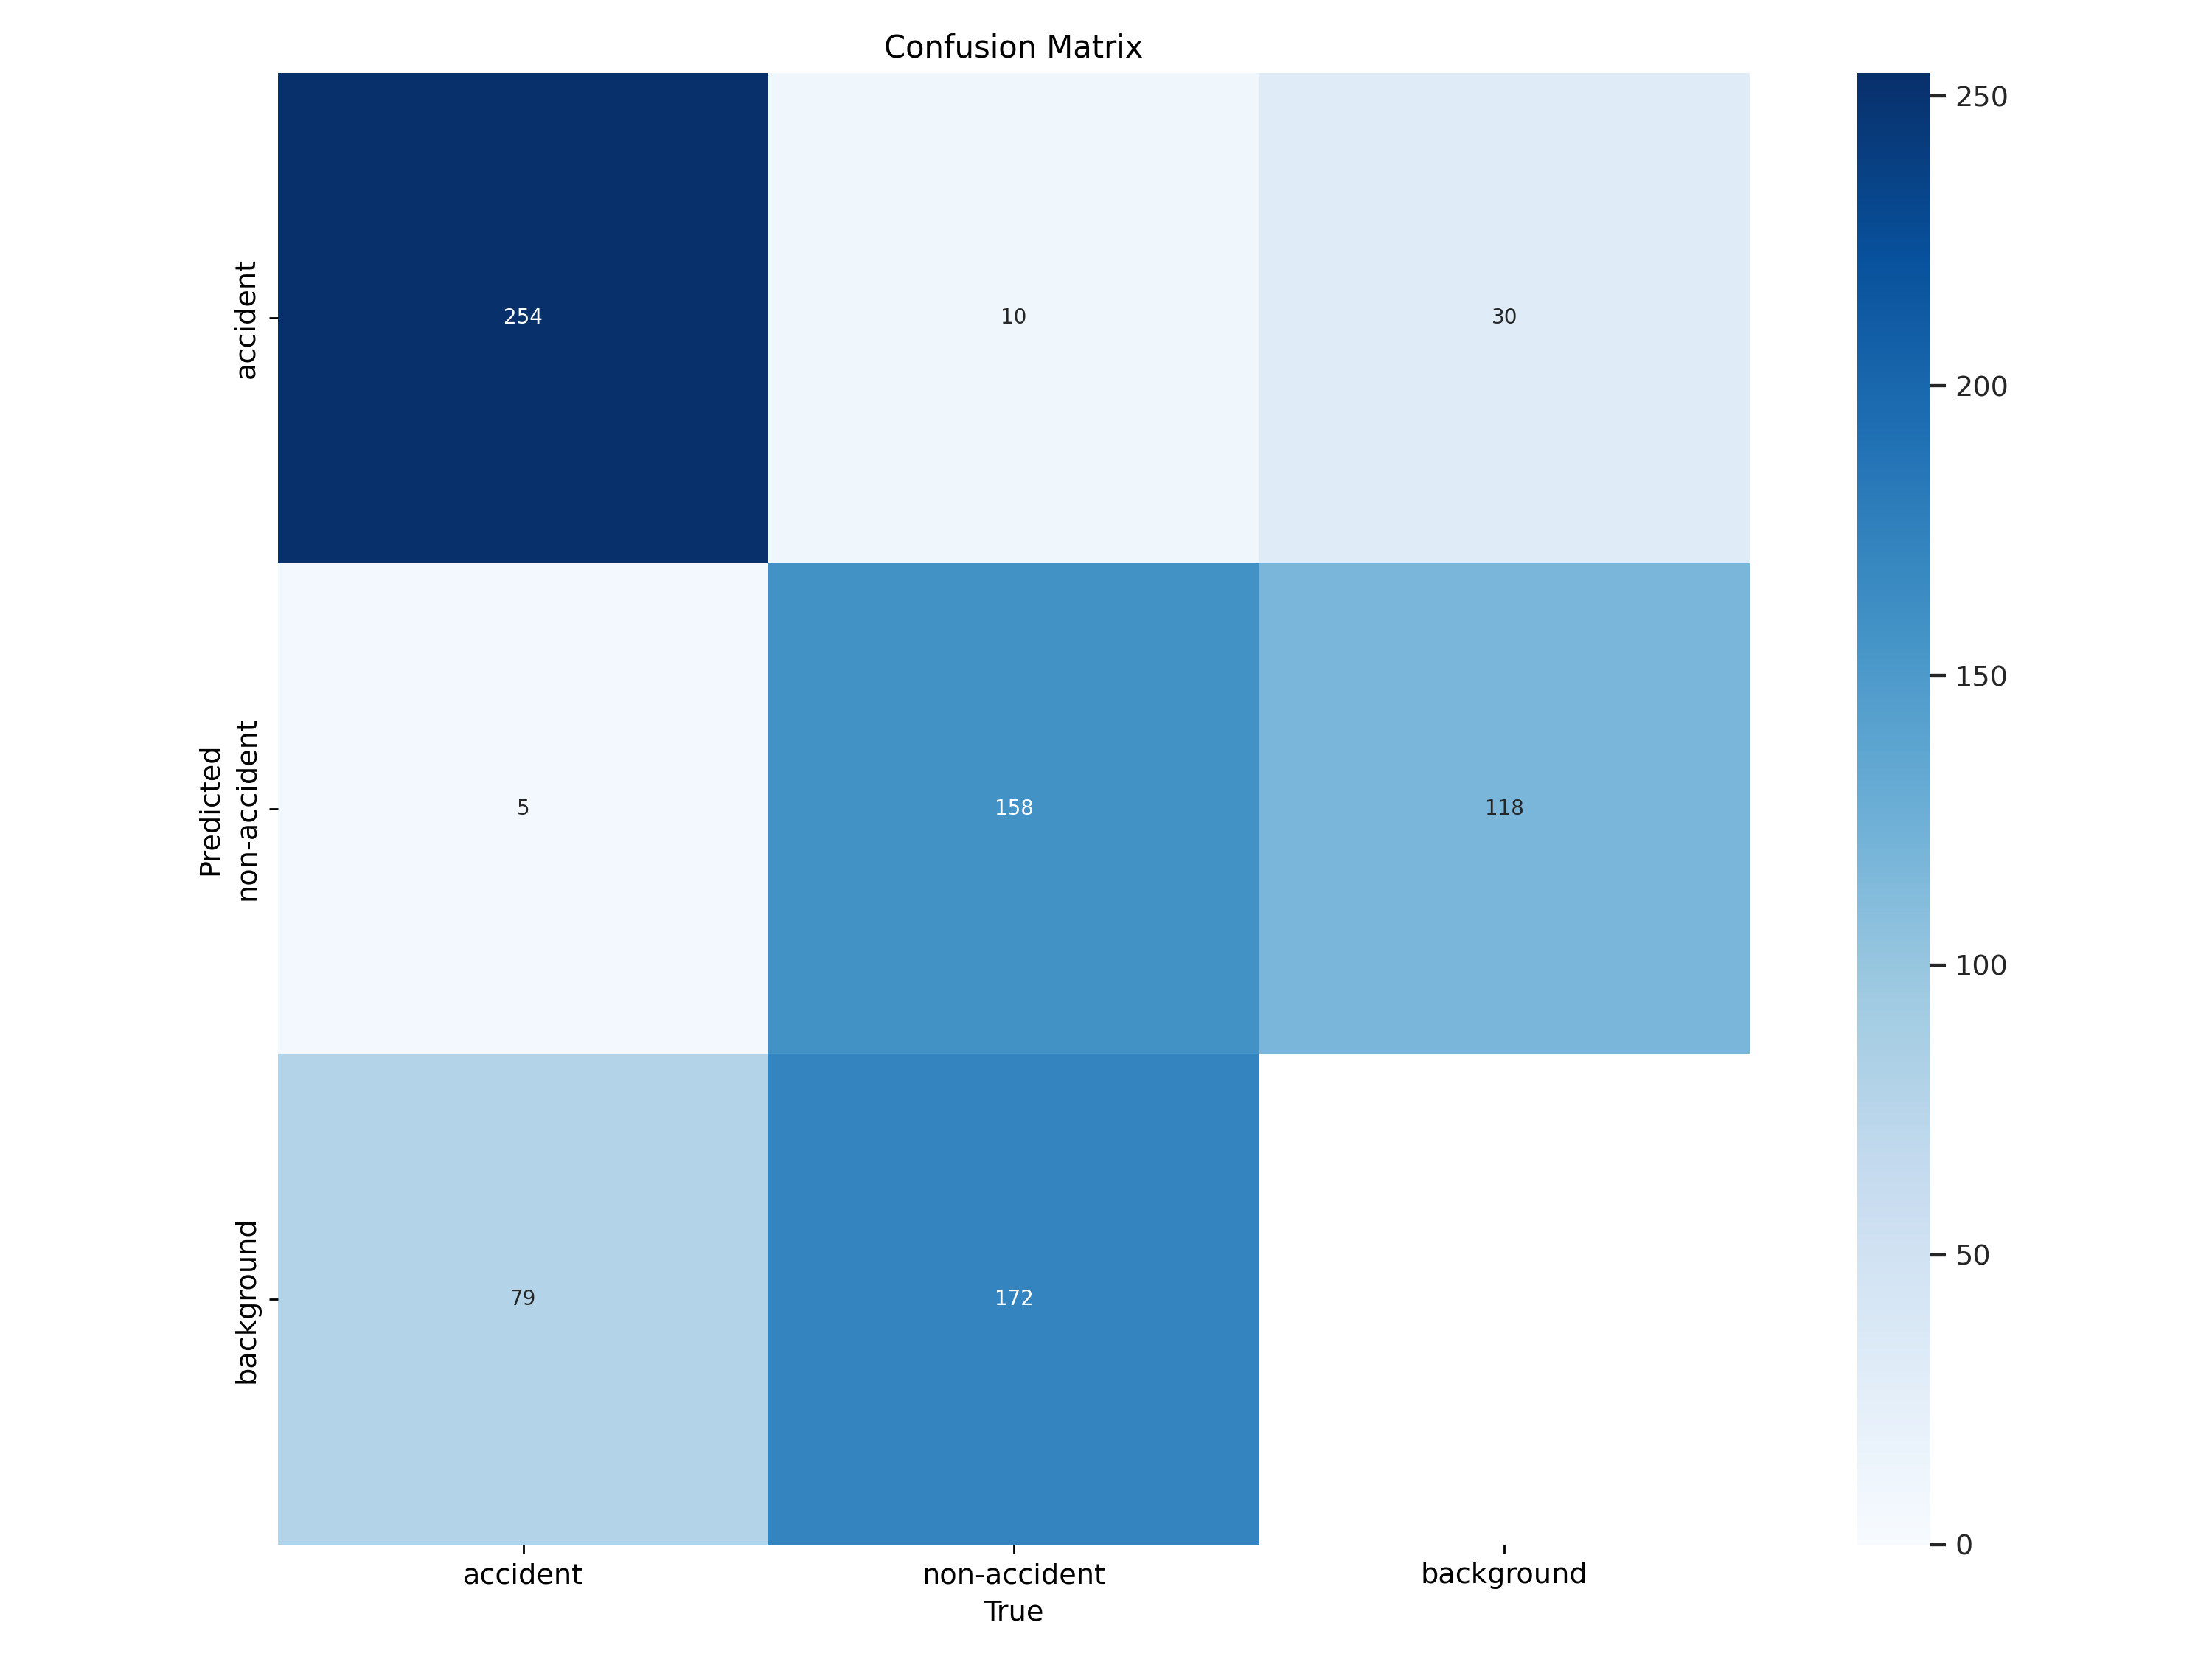

In [6]:
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)

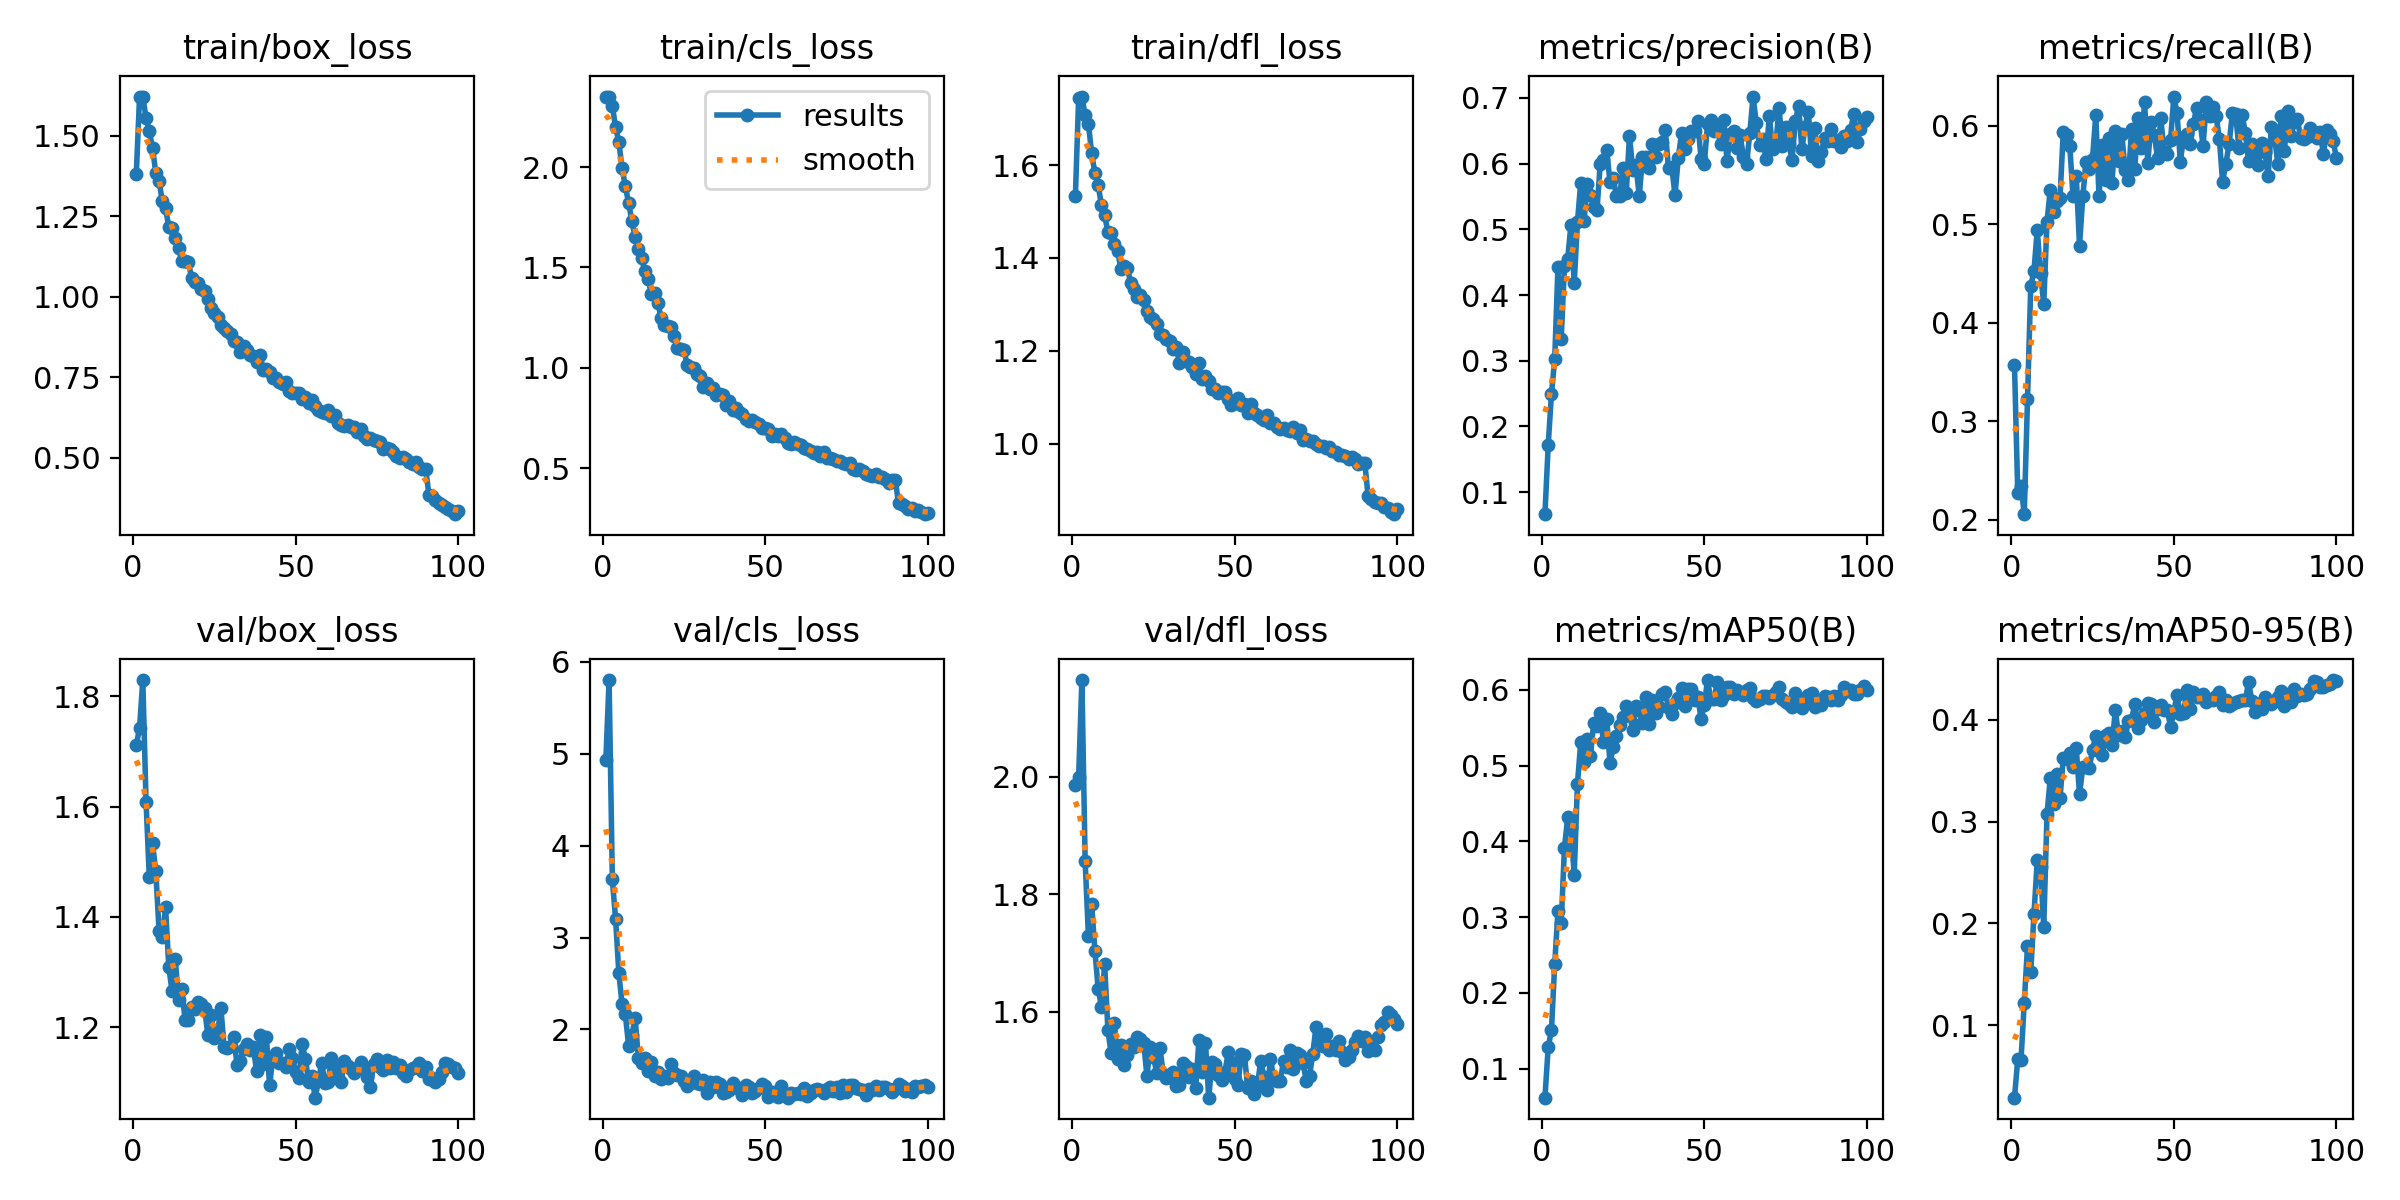

In [7]:
Image(filename=f'/content/runs/detect/train/results.png', width=600)

# You don't have to run it

In [9]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/Accident-and-Non-accident-label-Image-Dataset-14/data.yaml

Ultralytics YOLOv8.1.10 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/Accident-and-Non-accident-label-Image-Dataset-14/valid/labels.cache... 338 images, 22 backgrounds, 0 corrupt: 100% 338/338 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 22/22 [00:09<00:00,  2.44it/s]
                   all        338        678      0.665      0.585      0.605      0.439
              accident        338        338      0.808      0.731      0.824        0.6
          non-accident        338        340      0.522      0.438      0.385      0.278
Speed: 1.3ms preprocess, 10.8ms inference, 0.0ms loss, 3.9ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


# You don't have to run it

In [12]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.5 source='/content/Accident-and-Non-accident-label-Image-Dataset-14/test/images' save_txt=true

Ultralytics YOLOv8.1.10 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs

image 1/339 /content/Accident-and-Non-accident-label-Image-Dataset-14/test/images/0001_jpg.rf.d1730863cce2f5cafe527dfafc9f2a74.jpg: 640x640 (no detections), 14.2ms
image 2/339 /content/Accident-and-Non-accident-label-Image-Dataset-14/test/images/0015_jpg.rf.d51df57c5b4533e71466a3478b479886.jpg: 640x640 (no detections), 10.1ms
image 3/339 /content/Accident-and-Non-accident-label-Image-Dataset-14/test/images/0091_jpg.rf.dac86750d9ffe364a0787c4233f74e27.jpg: 640x640 (no detections), 9.4ms
image 4/339 /content/Accident-and-Non-accident-label-Image-Dataset-14/test/images/19_png.rf.f6a09f3c16834f61509330c67477738f.jpg: 640x640 (no detections), 9.3ms
image 5/339 /content/Accident-and-Non-accident-label-Image-Dataset-14/test/images/29_jpg.rf.f58685eee5162c3ee5568b6d7ac3788b.jpg: 640x640 (no detections), 9.3ms
image 

# You don't have to run it

In [ ]:
import glob
from Ipython.display import Image, display

from image_path in golb.glob(f'/content/runs/detect/predict/*.jpg'):
display(Image(filename=image_path, height=600))
print("\n")